[Image Processing in OpenCV](https://docs.opencv.org/4.0.1/d2/d96/tutorial_py_table_of_contents_imgproc.html)

## P47 形态学运算腐蚀

理论  
形态学转换(Morphological Transformations)  
在图像中提取分量信息，通常是图像最基本的形状特征  
如在识别手写数字时，能通过形态学运算得到其骨架信息  
在具体识别时，仅针对其骨架进行运算即可  
形态学在处理视觉检测、文字识别、医学图像处理、图像压缩编码等领域都有着重要的应用  

腐蚀可以将图像的边界点消除，使图像沿着边界向内收敛，也可以将小于指定结构体元素的部分取出  



cv.erode()  
dst=cv.erode(src, kernel\[,dstl,anchor\[,iterations\[,border Type\[, border/]/]/]/])  
src:输入图像，通道任意，深度必须为CV_8U, CV_16U, CV_16S, CV_32F或CV_64F中的一种  
dst:输出图像  
kernel:代表腐蚀操作时所采用的结构类型，可以自定义生成，也可以通过函数cv.getStructuringElement()  
anchor:锚点位置，默认(-1， -1) ，为核的中心位置  
iterations:腐蚀操作的迭代次数，默认值为1,即只进行-次腐蚀操作  
borderType:边界样式BorderTypes  

当kernel完全处于前景图像中，就将结构元中心点输出为前景色  
否则，结构元中心点输出位背景色


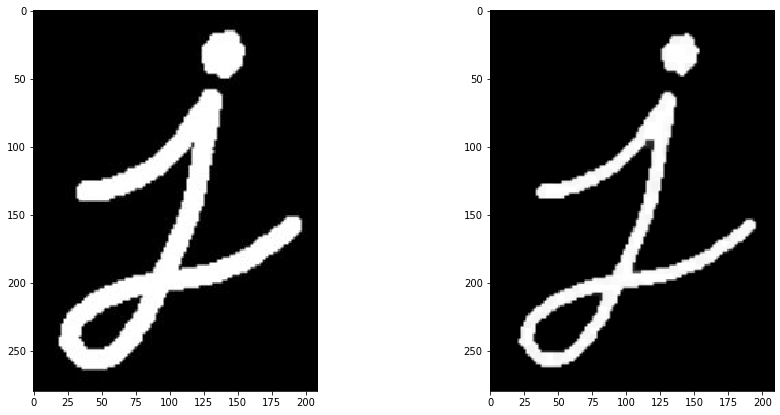

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = cv.imread('./opencv_dataset_01/cv_1301.JPG',0) #灰色图像
imageRGB = cv.cvtColor(img, cv.COLOR_GRAY2RGB )
tool.pltGrid(1,1)
plt.imshow(imageRGB)

kernel = np.ones((5, 5), np.uint8)#尺寸只能是奇数

erosion = cv.erode(img, kernel, iterations = 1)
imageRGB = cv.cvtColor(erosion, cv.COLOR_BGR2RGB) 
tool.pltGrid(2,1)
plt.imshow(imageRGB)
plt.show()


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = np.zeros((5, 5), np.uint8)
img[1:4,1:4] =1
kernel = np.ones((3, 1), np.uint8)
erosion = cv.erode(img, kernel)
print( 'img\n', img)
print(' kernel\n',kernel)
print('erosion\n',erosion)


img
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
 kernel
 [[1]
 [1]
 [1]]
erosion
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## P48 膨胀

## P-